In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
from typing import List, Tuple, Dict, Any
from rich.pretty import pprint

from pycomex.functional.experiment import Experiment

In [2]:
PATH = os.getcwd()
RESULTS_PATH = os.path.join(PATH, 'results')

# A list of identifier strings that will be matched to decide which experiments to include 
# in the evaluation. These strings can be used to differentiate between different runs of 
# an experiment.
IDENTIFIERS: List[str] = ['ex_04_a']

In [3]:
# ~ finding experiments

print('traversing experiment namespaces...')
experiment_namespace_paths: List[str] = [
    path
    for file in os.listdir(RESULTS_PATH)
    if os.path.isdir(path := os.path.join(RESULTS_PATH, file))
]
pprint(experiment_namespace_paths)

print('traversing experiment paths...')
experiment_paths: List[str] = [
    path
    for folder_path in experiment_namespace_paths
    for file in os.listdir(folder_path)
    if os.path.isdir(path := os.path.join(folder_path, file))
]
pprint(experiment_paths, max_length=10)

traversing experiment namespaces...


[
│   '/media/ssd/Programming/truthful_counterfactuals/truthful_counterfactuals/experiments/results/quantify_uncertainty__ens_mve__compas',
│   '/media/ssd/Programming/truthful_counterfactuals/truthful_counterfactuals/experiments/results/quantify_uncertainty__tscore__euc',
│   '/media/ssd/Programming/truthful_counterfactuals/truthful_counterfactuals/experiments/results/quantify_uncertainty__rep_ens',
│   '/media/ssd/Programming/truthful_counterfactuals/truthful_counterfactuals/experiments/results/quantify_uncertainty__ens_mve__aqsoldb',
│   '/media/ssd/Programming/truthful_counterfactuals/truthful_counterfactuals/experiments/results/quantify_uncertainty__mve',
│   '/media/ssd/Programming/truthful_counterfactuals/truthful_counterfactuals/experiments/results/counterfactual_truthfulness__ens',
│   '/media/ssd/Programming/truthful_counterfactuals/truthful_counterfactuals/experiments/results/quantify_uncertainty',
│   '/media/ssd/Programming/truthful_counterfactuals/truthful_counterfactuals/experiments/results/quantify_uncertainty__tscore__tan',
│   '/media/ssd/Programming/truthful_counterfactuals/truthful_counterfactuals/experiments/results/generate_logp_dataset',
│   '/media/ssd/Programming/truthful_counterfactuals/truthful_counterfactuals/experiments/results/quantify_uncertainty__ens_mve',
│   '/media/ssd/Programming/truthful_counterfactuals/truthful_counterfactuals/experiments/results/quantify_uncertainty__ens_mve__tadf',
│   '/media/ssd/Programming/truthful_counterfactuals/truthful_counterfactuals/experiments/results/quantify_uncertainty__swag',
│   '/media/ssd/Programming/truthful_counterfactuals/truthful_counterfactuals/experiments/results/counterfactual_truthfulness__mve',
│   '/media/ssd/Programming/truthful_counterfactuals/truthful_counterfactuals/experiments/results/quantify_uncertainty__rand',
│   '/media/ssd/Programming/truthful_counterfactuals/truthful_counterfactuals/experiments/results/counterfactual_truthfulness__ens_mve',
│   '/media/ssd/Programming/truthful_counterfactuals/truthful_counterfactuals/experiments/results/counterfactual_truthfulness',
│   '/media/ssd/Programming/truthful_counterfactuals/truthful_counterfactuals/experiments/results/quantify_uncertainty__ens_grad',
│   '/media/ssd/Programming/truthful_counterfactuals/truthful_counterfactuals/experiments/results/quantify_uncertainty__ens',
│   '/media/ssd/Programming/truthful_counterfactuals/truthful_counterfactuals/experiments/results/counterfactual_truthfulness__rand',
│   '/media/ssd/Programming/truthful_counterfactuals/truthful_counterfactuals/experiments/results/quantify_uncertainty__ens_mve__qm9',
│   '/media/ssd/Programming/truthful_counterfactuals/truthful_counterfactuals/experiments/results/quantify_uncertainty__ens_mve__lipop',
│   '/media/ssd/Programming/truthful_counterfactuals/truthful_counterfactuals/experiments/results/test_rep_ens',
│   '/media/ssd/Programming/truthful_counterfactuals/truthful_counterfactuals/experiments/results/quantify_uncertainty__tscore'
]

traversing experiment paths...


[
│   '/media/ssd/Programming/truthful_counterfactuals/truthful_counterfactuals/experiments/results/quantify_uncertainty__ens_mve__compas/05',
│   '/media/ssd/Programming/truthful_counterfactuals/truthful_counterfactuals/experiments/results/quantify_uncertainty__ens_mve__compas/04',
│   '/media/ssd/Programming/truthful_counterfactuals/truthful_counterfactuals/experiments/results/quantify_uncertainty__ens_mve__compas/25_09_2024__12_39__Hwdx',
│   '/media/ssd/Programming/truthful_counterfactuals/truthful_counterfactuals/experiments/results/quantify_uncertainty__ens_mve__compas/02',
│   '/media/ssd/Programming/truthful_counterfactuals/truthful_counterfactuals/experiments/results/quantify_uncertainty__ens_mve__compas/03',
│   '/media/ssd/Programming/truthful_counterfactuals/truthful_counterfactuals/experiments/results/quantify_uncertainty__ens_mve__compas/01',
│   '/media/ssd/Programming/truthful_counterfactuals/truthful_counterfactuals/experiments/results/quantify_uncertainty__tscore__euc/ex_01_a__31_01_2025__07_48__brDY',
│   '/media/ssd/Programming/truthful_counterfactuals/truthful_counterfactuals/experiments/results/quantify_uncertainty__tscore__euc/test__30_01_2025__17_55__yGhq',
│   '/media/ssd/Programming/truthful_counterfactuals/truthful_counterfactuals/experiments/results/quantify_uncertainty__tscore__euc/ex_01_a__31_01_2025__08_40__6b0k',
│   '/media/ssd/Programming/truthful_counterfactuals/truthful_counterfactuals/experiments/results/quantify_uncertainty__tscore__euc/ex_01_a__31_01_2025__05_13__XulQ',
│   ... +494
]

In [4]:
import time

# ~ loading experiments
# Now that we have the paths to all the experiment archive folders, we can now actually 
# load them back into memory
experiments: List[Experiment] = []

time_start = time.time()
for path in experiment_paths:
    
    experiment_data_path = os.path.join(path, 'experiment_data.json')
    if not os.path.exists(experiment_data_path):
        print(f'no experiment data found at {experiment_data_path}')
        continue
    
    try:
        experiment = Experiment.load(path)
    except:
        continue
    
    # We want to match a specific identifier
    if 'IDENTIFIER' not in experiment.parameters or experiment.parameters['IDENTIFIER'] not in IDENTIFIERS:
        continue
    
    experiments.append(experiment)
    
time_end = time.time()
    
print(f'loaded {len(experiments)} experiments in {time_end - time_start:.1f} seconds')

no experiment data found at /media/ssd/Programming/truthful_counterfactuals/truthful_counterfactuals/experiments/results/quantify_uncertainty__tscore__euc/test__30_01_2025__17_55__yGhq/experiment_data.json
no experiment data found at /media/ssd/Programming/truthful_counterfactuals/truthful_counterfactuals/experiments/results/quantify_uncertainty__mve/test__01_02_2025__08_32__9UZB/experiment_data.json
no experiment data found at /media/ssd/Programming/truthful_counterfactuals/truthful_counterfactuals/experiments/results/quantify_uncertainty__ens_mve/31_01_2025__09_48__uDBP/experiment_data.json
no experiment data found at /media/ssd/Programming/truthful_counterfactuals/truthful_counterfactuals/experiments/results/quantify_uncertainty__ens_mve/test__05_02_2025__07_09__zUu2/experiment_data.json
no experiment data found at /media/ssd/Programming/truthful_counterfactuals/truthful_counterfactuals/experiments/results/quantify_uncertainty__ens_mve/31_01_2025__09_56__qJAY/experiment_data.json
no

In [5]:
print('example experiment data:')
pprint(experiments[0].data, max_length=10)

from collections import defaultdict

# In this dict data structure, we collect the experiments that will later make up the table where the 
# key is a tuple (dataset_name, target_index) and the value is a list of experiments that match that key.
key_experiment_map: Dict[Tuple[float, str], List[Experiment]] = defaultdict(list)

for experiment in experiments:
    method_name = experiment.metadata['name'].split('__')[-1]
    noise_level = 0.0
    
    key = (noise_level, method_name)
    key_experiment_map[key].append(experiment)
    

# Here we sort the dictionary by the keys so that the table will be nicely ordered
key_experiment_map = dict(sorted(key_experiment_map.items(), key=lambda item: (item[0][0], item[0][1])))
    
pprint(key_experiment_map, max_length=3)

example experiment data:


{
│   'node_dim': 45,
│   'edge_dim': 11,
│   'indices': {
│   │   'train': [0, 2, 3, 4, 5, 6, 7, 10, 11, 12, ... +7928],
│   │   'test': [926, 1500, 1390, 5915, 2770, 10972, 5048, 4121, 9927, 3476, ... +1092],
│   │   'val': [8396, 9480, 8266, 1628, 7089, 8229, 6587, 10133, 6327, 3006, ... +1974]
│   },
│   'r2': {'test': 0.9977521088264358},
│   'mae': {'test': 0.10279067491516171},
│   'uncertainty': {
│   │   'test': {
│   │   │   'corr': 0.7953053877082163,
│   │   │   'auc_mean': 0.26701562035478055,
│   │   │   'auc_max': 0.8868479413318348,
│   │   │   '_thresholds_mean': [
│   │   │   │   0.0,
│   │   │   │   0.010101010101010166,
│   │   │   │   0.020202020202020332,
│   │   │   │   0.030303030303030276,
│   │   │   │   0.04040404040404044,
│   │   │   │   0.0505050505050505,
│   │   │   │   0.06060606060606066,
│   │   │   │   0.07070707070707061,
│   │   │   │   0.08080808080808077,
│   │   │   │   0.09090909090909094,
│   │   │   │   ... +90
│   │   │   ],
│   │   │   '_reductions_mean': [
│   │   │   │   0.15856167190050385,
│   │   │   │   0.15856167190050385,
│   │   │   │   0.15856167190050385,
│   │   │   │   0.16060366055029807,
│   │   │   │   0.16060366055029807,
│   │   │   │   0.16060366055029807,
│   │   │   │   0.16060366055029807,
│   │   │   │   0.16060366055029807,
│   │   │   │   0.16060366055029807,
│   │   │   │   0.16060366055029807,
│   │   │   │   ... +90
│   │   │   ],
│   │   │   '_thresholds_max': [
│   │   │   │   0.0,
│   │   │   │   0.010101010101010166,
│   │   │   │   0.020202020202020332,
│   │   │   │   0.030303030303030276,
│   │   │   │   0.04040404040404044,
│   │   │   │   0.0505050505050505,
│   │   │   │   0.06060606060606066,
│   │   │   │   0.07070707070707061,
│   │   │   │   0.08080808080808077,
│   │   │   │   0.09090909090909094,
│   │   │   │   ... +90
│   │   │   ],
│   │   │   '_reductions_max': [
│   │   │   │   0.8703518071129518,
│   │   │   │   0.8703518071129518,
│   │   │   │   0.8703518071129518,
│   │   │   │   0.8703518071129518,
│   │   │   │   0.8703518071129518,
│   │   │   │   0.8703518071129518,
│   │   │   │   0.8703518071129518,
│   │   │   │   0.8703518071129518,
│   │   │   │   0.8703518071129518,
│   │   │   │   0.8703518071129518,
│   │   │   │   ... +90
│   │   │   ]
│   │   },
│   │   'neighbor': {
│   │   │   'corr': 0.4141121542240765,
│   │   │   'auc_mean': 0.34855196598553584,
│   │   │   'auc_max': 0.22146840353929856,
│   │   │   '_thresholds_mean': [
│   │   │   │   0.0,
│   │   │   │   0.010101010101010166,
│   │   │   │   0.02020202020202022,
│   │   │   │   0.030303030303030387,
│   │   │   │   0.04040404040404033,
│   │   │   │   0.0505050505050505,
│   │   │   │   0.06060606060606055,
│   │   │   │   0.07070707070707072,
│   │   │   │   0.08080808080808088,
│   │   │   │   0.09090909090909094,
│   │   │   │   ... +90
│   │   │   ],
│   │   │   '_reductions_mean': [
│   │   │   │   0.31585677008897545,
│   │   │   │   0.3165311371835177,
│   │   │   │   0.3184379435292231,
│   │   │   │   0.32256458634864316,
│   │   │   │   0.32272989932187696,
│   │   │   │   0.32291969380195795,
│   │   │   │   0.32291969380195795,
│   │   │   │   0.32291969380195795,
│   │   │   │   0.32291969380195795,
│   │   │   │   0.3228915622139134,
│   │   │   │   ... +90
│   │   │   ],
│   │   │   '_thresholds_max': [
│   │   │   │   0.0,
│   │   │   │   0.010101010101010166,
│   │   │   │   0.02020202020202022,
│   │   │   │   0.030303030303030387,
│   │   │   │   0.04040404040404033,
│   │   │   │   0.0505050505050505,
│   │   │   │   0.06060606060606055,
│   │   │   │   0.07070707070707072,
│   │   │   │   0.08080808080808088,
│   │   │   │   0.09090909090909094,
│   │   │   │   ... +90
│   │   │   ],
│   │   │   '_reductions_max': [
│   │   │   │   0.22146840353929856,
│   │   │   │   0.22146840353929856,
│   │   │   │   0.22146840353929856,
│   │   │   │   0.22146840353929856,
│   │   │   │   0.22146840353929856,
│   │   │   │   0.22146840353929856,
│ 

{
│   (0.0, 'ens'): [
│   │   <pycomex.functional.experiment.Experiment object at 0x726af7d83340>,
│   │   <pycomex.functional.experiment.Experiment object at 0x726af776ca60>,
│   │   <pycomex.functional.experiment.Experiment object at 0x726af7713a30>,
│   │   ... +2
│   ],
│   (0.0, 'ens_mve'): [
│   │   <pycomex.functional.experiment.Experiment object at 0x726ae670a620>,
│   │   <pycomex.functional.experiment.Experiment object at 0x726ae6709120>,
│   │   <pycomex.functional.experiment.Experiment object at 0x726ae699afe0>,
│   │   ... +2
│   ],
│   (0.0, 'mve'): [
│   │   <pycomex.functional.experiment.Experiment object at 0x726ae6ba7460>,
│   │   <pycomex.functional.experiment.Experiment object at 0x726ae6a335e0>,
│   │   <pycomex.functional.experiment.Experiment object at 0x726ae691bbb0>,
│   │   ... +2
│   ]
}

In [57]:
from scipy.stats import iqr

column_names = [
    'Noise', 
    'Method', 
    r'Tst $R^2 \uparrow$', 
    r'Tst $\rho \uparrow$', 
    r'Tst $\text{UER-AUC}_{mean} \uparrow$',
    #r'Cf $R^2 \uparrow$',
    r'Cf $\rho \uparrow$',
    r'Cf $\text{UER-AUC}_{mean} \uparrow$',
    r'Cf $\text{Truth. Org}$ (\%)',
    r'Cf $\text{Truth. Gain}$ (\%)',
    ]

rows: List[list] = []

for (noise, method), experiments in key_experiment_map.items():
    
    row = [str(noise), method.replace('_', ' ')]
    keys = [
        'r2/test',
        'uncertainty/test/corr',
        'uncertainty/test/auc_mean',
        'uncertainty/counterfactual/corr',
        'uncertainty/counterfactual/auc_mean',
        'counterfactual_truthfulness/org',
        'counterfactual_truthfulness/diff',
    ]
    
    for key in keys:
        
        values: List[float] = []
        for experiment in experiments:
            try:
                value = float(experiment[key])
                values.append(value)
            except KeyError:
                print('error', experiment.metadata['name'])
        
        row.append(values)
        
    rows.append(row)
    
    # Define the desired order of datasets
    desired_order = ['mve', 'ens', 'ens mve']

    # Sort the rows based on the desired order
    rows.sort(key=lambda x: (desired_order.index(x[1]), x[0]))

    pprint(rows, max_length=5)
    
pprint(rows, max_length=5)

[
│   [
│   │   '0.0',
│   │   'ens',
│   │   [0.9977521088264358, 0.9972450059603313, 0.9953917979662062, 0.9970108400033573, 0.9956436066326525],
│   │   [0.7953053877082163, 0.6911798790285473, 0.42202774662423476, 0.45922774102989244, 0.52874750739414],
│   │   [0.26701562035478055, 0.3216628351229602, 0.32162770491629555, 0.2627944876466307, 0.25591361626966097],
│   │   ... +4
│   ]
]

[
│   [
│   │   '0.0',
│   │   'ens',
│   │   [0.9977521088264358, 0.9972450059603313, 0.9953917979662062, 0.9970108400033573, 0.9956436066326525],
│   │   [0.7953053877082163, 0.6911798790285473, 0.42202774662423476, 0.45922774102989244, 0.52874750739414],
│   │   [0.26701562035478055, 0.3216628351229602, 0.32162770491629555, 0.2627944876466307, 0.25591361626966097],
│   │   ... +4
│   ],
│   [
│   │   '0.0',
│   │   'ens mve',
│   │   [0.9934371391213015, 0.9743481506115612, 0.9901916662158925, 0.990933511435738, 0.9052076909225322],
│   │   [0.8391904314014602, 0.7481030708353508, 0.6593482740630903, 0.5303243050203937, 0.8183160945880179],
│   │   [0.3633238955519187, 0.29956387560689796, 0.3218009055058681, 0.3078898291065904, 0.3479631364722192],
│   │   ... +4
│   ]
]

error counterfactual_truthfulness__mve
error counterfactual_truthfulness__mve
error counterfactual_truthfulness__mve
error counterfactual_truthfulness__mve
error counterfactual_truthfulness__mve
error counterfactual_truthfulness__mve
error counterfactual_truthfulness__mve


[
│   [
│   │   '0.0',
│   │   'mve',
│   │   [0.984665013646392, 0.9850313206222343, 0.9905493525365251, 0.9729105639692511],
│   │   [0.4214124236856043, 0.753786004481631, 0.34661354148408036, 0.27082387701954214],
│   │   [0.16769583412650163, 0.2533442715989752, 0.12423912220844387, 0.08527261005131759],
│   │   ... +4
│   ],
│   [
│   │   '0.0',
│   │   'ens',
│   │   [0.9977521088264358, 0.9972450059603313, 0.9953917979662062, 0.9970108400033573, 0.9956436066326525],
│   │   [0.7953053877082163, 0.6911798790285473, 0.42202774662423476, 0.45922774102989244, 0.52874750739414],
│   │   [0.26701562035478055, 0.3216628351229602, 0.32162770491629555, 0.2627944876466307, 0.25591361626966097],
│   │   ... +4
│   ],
│   [
│   │   '0.0',
│   │   'ens mve',
│   │   [0.9934371391213015, 0.9743481506115612, 0.9901916662158925, 0.990933511435738, 0.9052076909225322],
│   │   [0.8391904314014602, 0.7481030708353508, 0.6593482740630903, 0.5303243050203937, 0.8183160945880179],
│   │   [0.3633238955519187, 0.29956387560689796, 0.3218009055058681, 0.3078898291065904, 0.3479631364722192],
│   │   ... +4
│   ]
]

[
│   [
│   │   '0.0',
│   │   'mve',
│   │   [0.984665013646392, 0.9850313206222343, 0.9905493525365251, 0.9729105639692511],
│   │   [0.4214124236856043, 0.753786004481631, 0.34661354148408036, 0.27082387701954214],
│   │   [0.16769583412650163, 0.2533442715989752, 0.12423912220844387, 0.08527261005131759],
│   │   ... +4
│   ],
│   [
│   │   '0.0',
│   │   'ens',
│   │   [0.9977521088264358, 0.9972450059603313, 0.9953917979662062, 0.9970108400033573, 0.9956436066326525],
│   │   [0.7953053877082163, 0.6911798790285473, 0.42202774662423476, 0.45922774102989244, 0.52874750739414],
│   │   [0.26701562035478055, 0.3216628351229602, 0.32162770491629555, 0.2627944876466307, 0.25591361626966097],
│   │   ... +4
│   ],
│   [
│   │   '0.0',
│   │   'ens mve',
│   │   [0.9934371391213015, 0.9743481506115612, 0.9901916662158925, 0.990933511435738, 0.9052076909225322],
│   │   [0.8391904314014602, 0.7481030708353508, 0.6593482740630903, 0.5303243050203937, 0.8183160945880179],
│   │   [0.3633238955519187, 0.29956387560689796, 0.3218009055058681, 0.3078898291065904, 0.3479631364722192],
│   │   ... +4
│   ]
]

In [58]:
# ~ Generating the latex table

from truthful_counterfactuals.utils import render_latex
from truthful_counterfactuals.utils import latex_table

# ~ rendering latex

tex_content, tex_table = latex_table(
    column_names=column_names,
    rows=rows
)
print(tex_table)

tex_path = os.path.join(PATH, '_results_ex_04.tex')
with open(tex_path, 'w') as file:
    file.write(tex_table)

pdf_path = os.path.join(PATH, '_results_ex_04.pdf')
render_latex({'content': tex_table}, pdf_path)

\begin{tabular}{ ccccccccc }
% -- table header --
\toprule
Noise &
Method &
Tst $R^2 \uparrow$ &
Tst $\rho \uparrow$ &
Tst $\text{UER-AUC}_{mean} \uparrow$ &
Cf $\rho \uparrow$ &
Cf $\text{UER-AUC}_{mean} \uparrow$ &
Cf $\text{Truth. Org}$ (\%) &
Cf $\text{Truth. Gain}$ (\%) \\

\midrule
% -- table content --
% row 1
0.0 &
mve &
$0.98 {\color{gray} \pm \mathsmaller{ 0.01 } }$ &
$0.45 {\color{gray} \pm \mathsmaller{ 0.18 } }$ &
$0.16 {\color{gray} \pm \mathsmaller{ 0.06 } }$ &
$0.29 {\color{gray} \pm \mathsmaller{ 0.19 } }$ &
$0.10 {\color{gray} \pm \mathsmaller{ 0.09 } }$ &
$0.76 {\color{gray} \pm \mathsmaller{ 0.09 } }$ &
$0.08 {\color{gray} \pm \mathsmaller{ 0.10 } }$ 
\\
% row 2
0.0 &
ens &
$1.00 {\color{gray} \pm \mathsmaller{ 0.00 } }$ &
$0.58 {\color{gray} \pm \mathsmaller{ 0.14 } }$ &
$0.29 {\color{gray} \pm \mathsmaller{ 0.03 } }$ &
$0.35 {\color{gray} \pm \mathsmaller{ 0.18 } }$ &
$0.19 {\color{gray} \pm \mathsmaller{ 0.06 } }$ &
$0.97 {\color{gray} \pm \mathsmaller{ 0.01 } }$

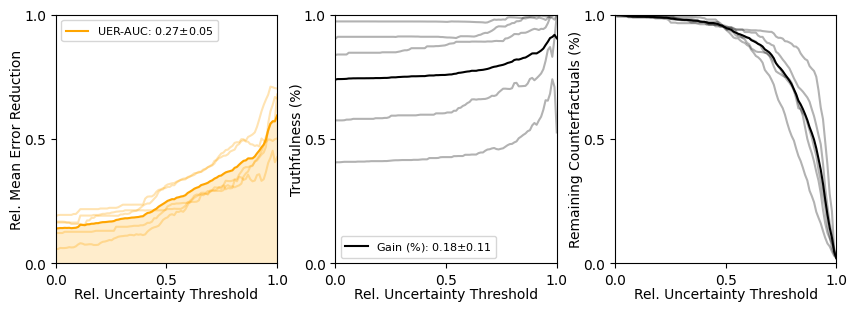

In [62]:
import matplotlib as mpl
from scipy.interpolate import interp1d
import matplotlib.pyplot as plt

mpl.use('Agg')
plt.style.use('default')

key = (0.0, 'ens_mve')

# collect all the experiments that match the key
experiments: List[Experiment] = key_experiment_map[key]

# ~ plotting
# Now we go through all of the experiments and we want to create 3 plots
# - The joint UER-mean plot
# - the truthfulness over threshold plot
# - the ratio of remaining elements over threshold plot

plt.subplots_adjust(wspace=0.0)
fig, (ax_auc, ax_tru, ax_rem) = plt.subplots(1, 3, figsize=(8.5, 3), tight_layout=True, constrained_layout=True)
fig.tight_layout(pad=0.8)

aucs_list: List[List[float]] = []

ths_list = []
tru_list = []
rem_list = []

for experiment in experiments:
    
    ths = experiment['truthfulness/counterfactual/thresholds']
    trs = experiment['truthfulness/counterfactual/truthfulness']
    lens = experiment['truthfulness/counterfactual/lengths']
    rems = [l / lens[0] for l in lens]
    ths_list.append(ths)
    tru_list.append(trs)
    rem_list.append(rems)
    
    ax_tru.plot(ths, trs, color='black', alpha=0.3)
    ax_rem.plot(ths, rems, color='black', alpha=0.3)
    
    sigs = experiment['uncertainty/counterfactual/_thresholds_mean']
    aucs = experiment['uncertainty/counterfactual/_reductions_mean']
    aucs_list.append(aucs)
    ax_auc.plot(sigs, aucs, color='orange', alpha=0.3)

labelpad = 0

aucs_arr = np.array(aucs_list)
auc_mean = np.mean([e['uncertainty/counterfactual/auc_mean'] for e in experiments])
auc_std = np.std([e['uncertainty/counterfactual/auc_mean'] for e in experiments])
ax_auc.plot(sigs, np.mean(aucs_arr, axis=0), color='orange', label=f'UER-AUC: {auc_mean:.2f}$\pm${auc_std:.2f}')
ax_auc.fill_between(sigs, np.mean(aucs_arr, axis=0), color='orange', alpha=0.2)
ax_auc.legend(loc='upper left', fontsize=8)
ax_auc.set_xlabel('Rel. Uncertainty Threshold', labelpad=labelpad)
ax_auc.set_ylabel('Rel. Mean Error Reduction', labelpad=labelpad)
ax_auc.set_xlim([0, 1])
ax_auc.set_ylim([0, 1])
ax_auc.set_xticks([0, 0.5, 1.0])
ax_auc.set_yticks([0, 0.5, 1.0])

# Calculate the average over the functions defined by x values in ths_list and y values in tru_list

# Define a common x-axis for interpolation
common_x = np.linspace(0, 1, 100)

# Interpolate y values to the common x-axis
interpolated_tru_list = []
for ths, tru in zip(ths_list, tru_list):
    f = interp1d(ths, tru, bounds_error=False, fill_value="extrapolate")
    interpolated_tru_list.append(f(common_x))

# Calculate the average y values
average_tru = np.mean(interpolated_tru_list, axis=0)

# Plot the average truthfulness
trus_mean = np.mean([e['counterfactual_truthfulness/diff'] for e in experiments])
trus_std = np.std([e['counterfactual_truthfulness/diff'] for e in experiments])
ax_tru.plot(common_x, average_tru, color='black', label=f'Gain (%): {trus_mean:.2f}$\pm${trus_std:.2f}')
ax_tru.legend(loc='lower left', fontsize=8)
ax_tru.set_xlabel('Rel. Uncertainty Threshold', labelpad=labelpad)
ax_tru.set_ylabel('Truthfulness (%)', labelpad=labelpad)
ax_tru.set_xlim([0, 1])
ax_tru.set_ylim([0, 1])
ax_tru.set_yticks([0, 0.5, 1.0])
ax_tru.set_xticks([0, 0.5, 1.0])

# Calculate the average over the functions defined by x values in ths_list and y values in rem_list

# Interpolate y values to the common x-axis
interpolated_rem_list = []
for ths, rem in zip(ths_list, rem_list):
    f = interp1d(ths, rem, bounds_error=False, fill_value="extrapolate")
    interpolated_rem_list.append(f(common_x))

# Calculate the average y values
average_rem = np.mean(interpolated_rem_list, axis=0)

# Plot the average remaining ratios
ax_rem.plot(common_x, average_rem, color='black', label='Average Remaining Ratios')
# ax_rem.legend(loc='lower left', fontsize=8)

ax_rem.set_xlabel('Rel. Uncertainty Threshold', labelpad=labelpad)
ax_rem.set_ylabel('Remaining Counterfactuals (%)', labelpad=labelpad)
ax_rem.set_xlim([0, 1])
ax_rem.set_ylim([0, 1])
ax_rem.set_xticks([0, 0.5, 1.0])
ax_rem.set_yticks([0, 0.5, 1.0])
   
fig_path = os.path.join(PATH, '_fig_ex_04.pdf')
fig.savefig(fig_path) 
fig